# Study of K-means

In [1]:
import numpy as np
from numpy.linalg import norm

Implementing Kmeans algorithm

In [42]:
class Kmeans:
    def __init__(self, n_clusters, max_iter = 100, random_state = 123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis = 0)
        return centroids
    
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)


# Applying Kmeans on Geyser's Eruptions Segmentation

Import libraries

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.datasets.samples_generator import (make_blobs, make_circles, make_moons)
from sklearn.cluster import KMeans, SpectralBiclustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

Import dataset

In [10]:
df = pd.read_csv('D:\Repositorio GitHub\ML_Studies_and_Projects\Kmean study/faithful.csv')

In [25]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Drop the column "Unnamed: 0"

In [27]:
df = df.drop(labels = "Unnamed: 0", axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [28]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Plot the data


Text(0.5, 1.0, 'Visualization of raw data')

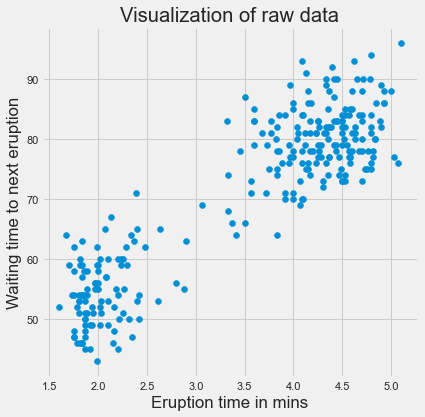

In [29]:
plt.figure(figsize = (6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel("Eruption time in mins")
plt.ylabel("Waiting time to next eruption")
plt.title("Visualization of raw data")

In [32]:
X_std = StandardScaler().fit_transform(df)

In [33]:
km = Kmeans(n_clusters = 2, max_iter = 100)
km.fit(X_std)
centroids = km.centroids

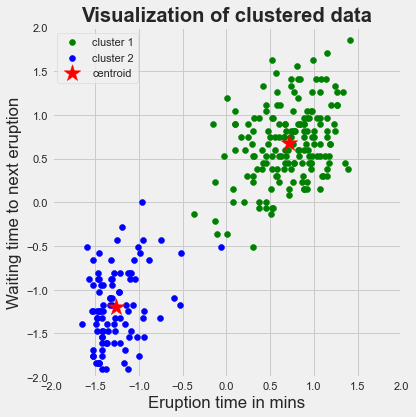

In [35]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1], c = 'green', label = 'cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1], c = 'blue', label = 'cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', s = 300, c = 'r', label = "centroid")
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight = 'bold')
ax.set_aspect('equal')

In [34]:
km.centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

# Plot elbow method

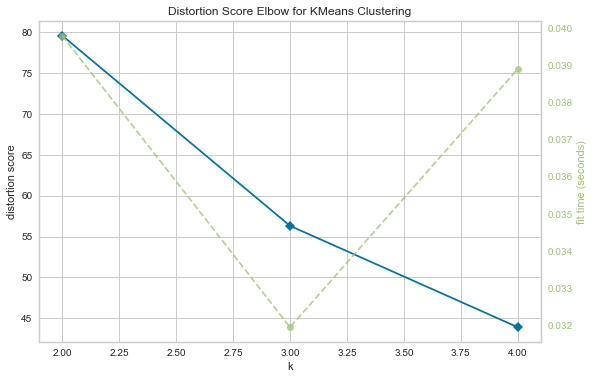

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001B328272B08>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [43]:
from yellowbrick.cluster.elbow import kelbow_visualizer

model = KMeans(random_state = 42)
kelbow_visualizer(model, X_std, k = (2, 5))

# Silhouette analyses

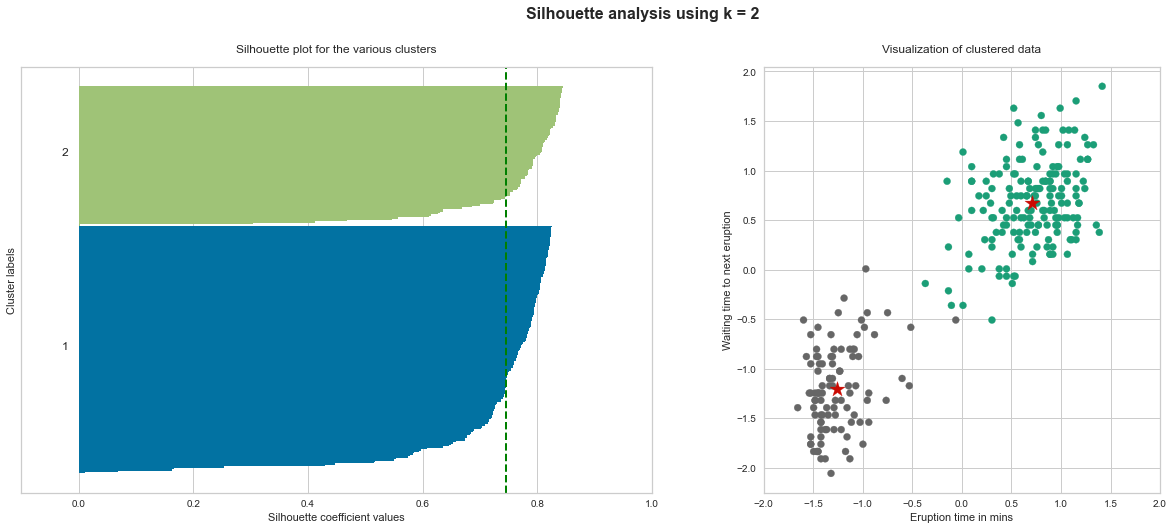

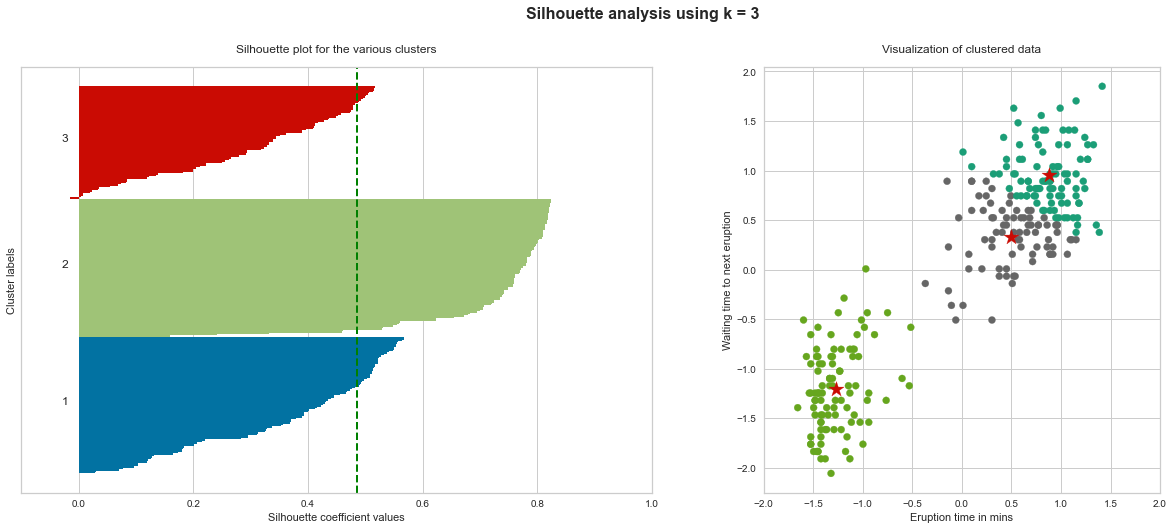

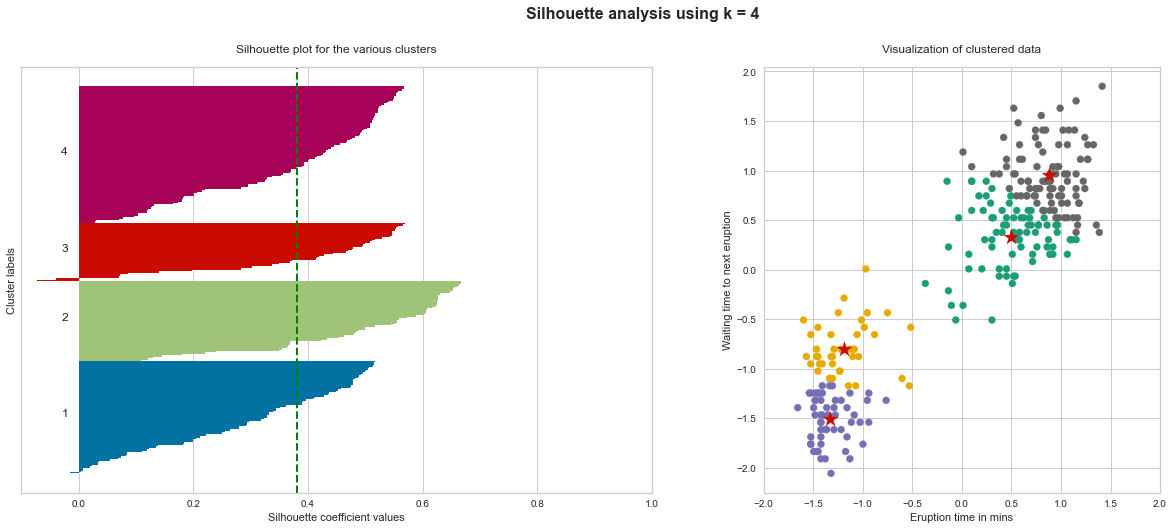

In [49]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    km = KMeans(n_clusters = k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    y_ticks = []
    y_lower, y_upper = 0, 0

    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    ax2.scatter(X_std[:, 0], X_std[:, 1], c = labels, cmap = "Dark2")
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Using the library "Yellowbrick"

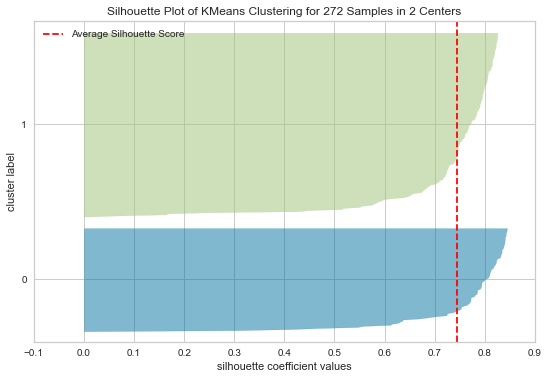

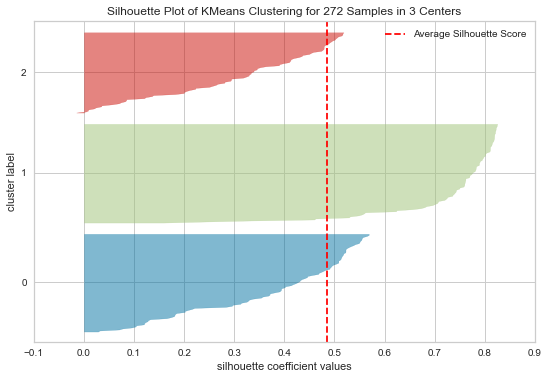

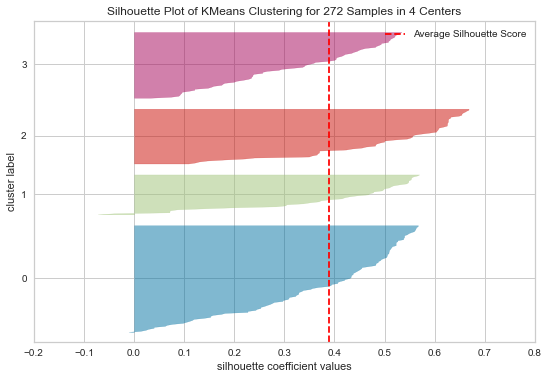

In [56]:
from yellowbrick.cluster import silhouette_visualizer

for i in range(2, 5): 
    silhouette_visualizer(KMeans(n_clusters = i, random_state = 0), X_std, colors = 'yellowbrick')